<a href="https://colab.research.google.com/github/Emilyjane994/Development-of-Novel-MLfor-predicting-TCR-peptide-MHC-binding-/blob/main/Testing_encoding_methods_for_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive (Run this in Google Colab environment)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install epitopepredict

In [ ]:
import os, sys, math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)
import epitopepredict as ep

wrote config file /root/.config/epitopepredict/default.conf


In [ ]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def show_matrix(m):
    #display a matrix
    cm = sns.light_palette("seagreen", as_cmap=True)
    display(m.style.background_gradient(cmap=cm))

def one_hot_encode(seq):
    o = list(set(codes) - set(seq))
    s = pd.DataFrame(list(seq))
    x = pd.DataFrame(np.zeros((len(seq),len(o)),dtype=int),columns=o)
    a = s[0].str.get_dummies(sep=',')
    a = a.join(x)
    a = a.sort_index(axis=1)
    #show_matrix(a)
    e = a.values.flatten()
    return e

pep='ALDFEQEMT'
e=one_hot_encode(pep)


In [ ]:
import pandas as pd
import numpy as np

# Amino acid codes and their corresponding integer encoding
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
amino_acids_dict = {amino: idx for idx, amino in enumerate(codes)}

def show_matrix(m):
    # Display a matrix
    print(m)

def integer_encode(seq):
    # Encode the sequence using integer encoding
    encoded_seq = [amino_acids_dict[amino] for amino in seq]
    a = pd.DataFrame(np.zeros((len(seq), len(codes)), dtype=int), columns=codes)
    a.loc[range(len(seq)), encoded_seq] = 1
    #show_matrix(a)
    e = a.values.flatten()
    return e


pep = 'AENDTLVVSV'
e = integer_encode(pep)



In [ ]:
pep = 'AENDTLVVSV'
e = integer_encode(pep)

In [ ]:
import pandas as pd
import numpy as np

# Define your VHSE8 encoding dictionary

vhse8_encoding = {
    'A': (0.15, 21.11, 21.35, 20.92, 0.02, 20.91, 0.36, 20.48),
    'R': (21.47, 1.45, 1.24, 1.27, 1.55, 1.47, 1.30, 0.83),
    'N': (20.99, 0.00, 20.37, 0.69, 20.55, 0.85, 0.73, 20.80),
    'D': (21.15, 0.67, 20.41, 20.01, 22.68, 1.31, 0.03, 0.56),
    'C': (0.18, 21.67, 20.46, 20.21, 0.00, 1.20, 21.61, 20.19),
    'Q': (20.96, 0.12, 0.18, 0.16, 0.09, 0.42, 20.20, 20.41),
    'E': (21.18, 0.40, 0.10, 0.36, 22.16, 20.17, 0.91, 0.02),
    'G': (20.20, 21.53, 22.63, 2.28, 20.53, 21.18, 2.01, 21.34),
    'H': (20.43, 20.25, 0.37, 0.19, 0.51, 1.28, 0.93, 0.65),
    'I': (1.27, 20.14, 0.30, 21.80, 0.30, 21.61, 20.16, 20.13),
    'L': (1.36, 0.07, 0.26, 20.80, 0.22, 21.37, 0.08, 20.62),
    'K': (21.17, 0.70, 0.70, 0.80, 1.64, 0.67, 1.63, 0.13),
    'M': (1.01, 20.53, 0.43, 0.00, 0.23, 0.10, 20.86, 20.68),
    'F': (1.52, 0.61, 0.96, 20.16, 0.25, 0.28, 21.33, 20.20),
    'P': (0.22, 20.17, 20.50, 0.05, 20.01, 21.34, 20.19, 3.56),
    'S': (20.67, 20.86, 21.07, 20.41, 20.32, 0.27, 20.64, 0.11),
    'T': (20.34, 20.51, 20.55, 21.06, 0.01, 20.01, 20.79, 0.39),
    'W': (1.50, 2.06, 1.79, 0.75, 0.75, 20.13, 21.06, 20.85),
    'Y': (0.61, 1.60, 1.17, 0.73, 0.53, 0.25, 20.96, 20.52),
    'V': (0.76, 20.92, 0.17, 21.91, 0.22, 21.40, 20.24, 20.03)
}

def vhse8_encode(sequence):
    encoded_sequence = [vhse8_encoding[aa] for aa in sequence]
    return encoded_sequence

pep = 'AENDTLVVSV'
e = vhse8_encode(pep)
print(e)



[(0.15, 21.11, 21.35, 20.92, 0.02, 20.91, 0.36, 20.48), (21.18, 0.4, 0.1, 0.36, 22.16, 20.17, 0.91, 0.02), (20.99, 0.0, 20.37, 0.69, 20.55, 0.85, 0.73, 20.8), (21.15, 0.67, 20.41, 20.01, 22.68, 1.31, 0.03, 0.56), (20.34, 20.51, 20.55, 21.06, 0.01, 20.01, 20.79, 0.39), (1.36, 0.07, 0.26, 20.8, 0.22, 21.37, 0.08, 20.62), (0.76, 20.92, 0.17, 21.91, 0.22, 21.4, 20.24, 20.03), (0.76, 20.92, 0.17, 21.91, 0.22, 21.4, 20.24, 20.03), (20.67, 20.86, 21.07, 20.41, 20.32, 0.27, 20.64, 0.11), (0.76, 20.92, 0.17, 21.91, 0.22, 21.4, 20.24, 20.03)]


In [ ]:
sequence = 'AENDTLVVSV'
encoded_sequence = [vhse8_encoding[aa] for aa in sequence]
# Flatten the encoded sequence into a 1D array
flat_encoded_sequence = [value for tup in encoded_sequence for value in tup]

In [ ]:
flat_encoded_sequence

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/iPREP Biodesign project

/content/gdrive/MyDrive/iPREP Biodesign project


In [ ]:
nlf = pd.read_csv('NLF.csv', encoding='latin', low_memory=False)

def nlf_encode(seq):
    x = pd.DataFrame([nlf[i] for i in seq]).reset_index(drop=True)
    #show_matrix(x)
    e = x.values.flatten()
    return e

e=nlf_encode(pep)

In [ ]:
blosum = ep.blosum62

def blosum_encode(seq):
    #encode a peptide into blosum features
    s=list(seq)
    x = pd.DataFrame([blosum[i] for i in seq]).reset_index(drop=True)
    #show_matrix(x)
    e = x.values.flatten()
    return e

def random_encode(p):
    return [np.random.randint(20) for i in pep]

e=blosum_encode(pep)

In [ ]:
df = ep.get_training_set()
display(df[:5])

,allele,peptide,ic50,measurement_inequality,measurement_type,measurement_source,original_allele,log50k,length
0,BoLA-1*21:01,AENDTLVVSV,7817.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-1*02101,0.171512,10
1,BoLA-1*21:01,NQFNGGCLLV,1086.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-1*02101,0.353937,10
2,BoLA-2*08:01,AAHCIHAEW,21.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.718615,9
3,BoLA-2*08:01,AAKHMSNTY,1299.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.337385,9
4,BoLA-2*08:01,DSYAYMRNGW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.935937,10


In [ ]:
df

,allele,peptide,ic50,measurement_inequality,measurement_type,measurement_source,original_allele,log50k,length
0,BoLA-1*21:01,AENDTLVVSV,7817.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-1*02101,0.171512,10
1,BoLA-1*21:01,NQFNGGCLLV,1086.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-1*02101,0.353937,10
2,BoLA-2*08:01,AAHCIHAEW,21.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.718615,9
3,BoLA-2*08:01,AAKHMSNTY,1299.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.337385,9
4,BoLA-2*08:01,DSYAYMRNGW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.935937,10
...,...,...,...,...,...,...,...,...,...
234257,SLA-1*07:02,SVELNAPNY,20000.0,=,quantitative,Montoya - binding assay,SLA-1*07:02,0.084687,9
234258,SLA-1*07:02,SVELNAPNY,231.0,=,quantitative,Montoya - binding assay,SLA-1*07:02,0.496994,9
234259,SLA-1*07:02,SVKNGTYDY,20000.0,=,quantitative,Montoya - binding assay,SLA-1*07:02,0.084687,9
234260,SLA-1*07:02,TLYQNNHTY,6.0,=,quantitative,Montoya - binding assay,SLA-1*07:02,0.834400,9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [ ]:
def vhse8_encode(sequence):
    encoded_sequence = [vhse8_encoding[aa] for aa in sequence]
    # Concatenate the encoded values into a single 1D array
    flat_encoded_sequence = [value for tup in encoded_sequence for value in tup]
    return flat_encoded_sequence


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


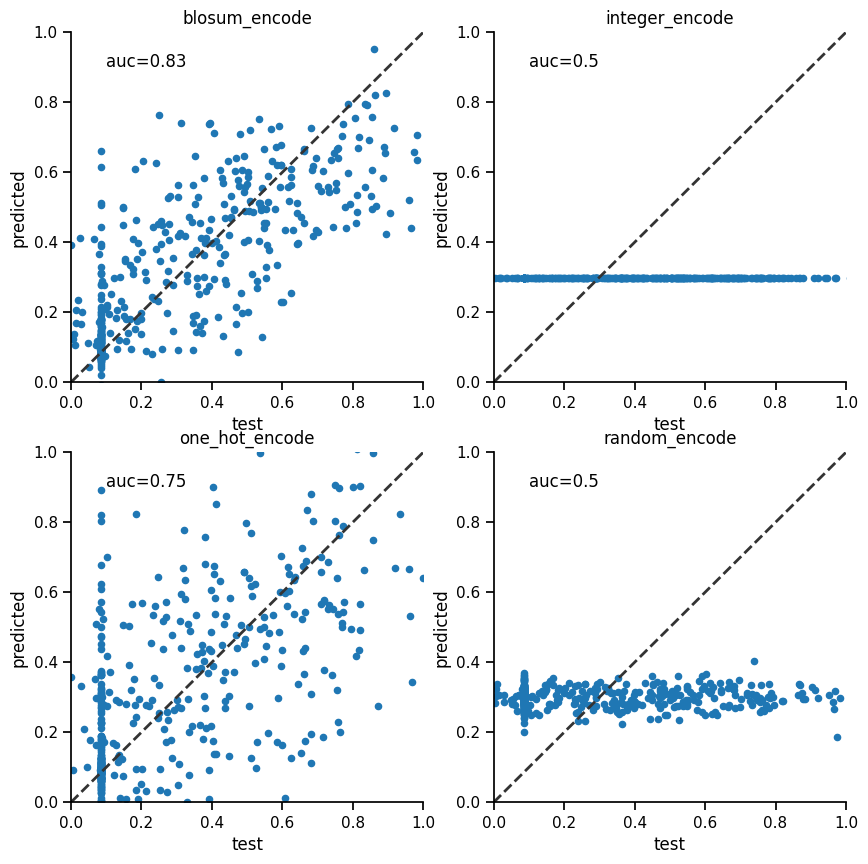

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
from sklearn.neural_network import MLPRegressor
import epitopepredict as ep
import matplotlib.pyplot as plt
import seaborn as sns

def auc_score(true,sc,cutoff=None):

    if cutoff!=None:
        true = (true<=cutoff).astype(int)
        sc = (sc<=cutoff).astype(int)
    fpr, tpr, thresholds = metrics.roc_curve(true, sc, pos_label=1)
    r = metrics.auc(fpr, tpr)
    #print (r)
    return  r

def test_predictor(allele, encoder, ax):

    reg = MLPRegressor(hidden_layer_sizes=(20), alpha=0.01, max_iter=500,
                        activation='relu', solver='lbfgs', random_state=2)
    df = ep.get_training_set(allele, length=9)
    #print (len(df))
    X = df.peptide.apply(lambda x: pd.Series(np.array(encoder(x))), 1)
    y = df.log50k
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    reg.fit(X_train, y_train)
    sc = reg.predict(X_test)
    x=pd.DataFrame(np.column_stack([y_test,sc]),columns=['test','predicted'])
    x.plot('test','predicted',kind='scatter',s=20,ax=ax)
    ax.plot((0,1), (0,1), ls="--", lw=2, c=".2")
    ax.set_xlim((0,1));  ax.set_ylim((0,1))
    ax.set_title(encoder.__name__)
    auc = ep.auc_score(y_test,sc,cutoff=.426)
    ax.text(.1,.9,'auc=%s' %round(auc,2))
    sns.despine()

sns.set_context('notebook')
encs=[blosum_encode,integer_encode,one_hot_encode,random_encode]
allele='HLA-A*03:01'
fig,axs=plt.subplots(2,2,figsize=(10,10))
axs=axs.flat
i=0
for enc in encs:
    test_predictor(allele,enc,ax=axs[i])
    i+=1



In [ ]:
flat_encoded_sequence

X shape before splitting: 4569, 72
y shape before splitting: (4569,)


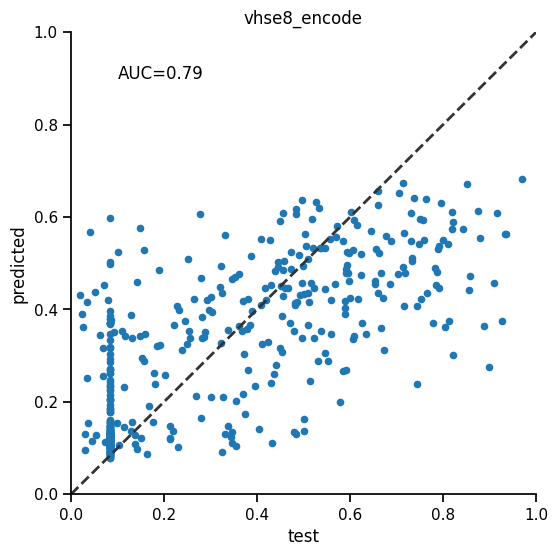

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import epitopepredict as ep
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
from sklearn.neural_network import MLPRegressor
import epitopepredict as ep
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

def test_predictor(allele, encoder, ax):
    reg = MLPRegressor(hidden_layer_sizes=(20,), alpha=0.01, max_iter=500,
                       activation='relu', solver='lbfgs', random_state=2)
    df = ep.get_training_set(allele, length=9)

    # Use flat_encoded_sequence as X
    X = [encoder(x) for x in df.peptide]

    y = df.log50k

    # Debugging: Print the shapes of X and y
    print(f"X shape before splitting: {len(X)}, {len(X[0])}")
    print(f"y shape before splitting: {y.shape}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    reg.fit(X_train, y_train)
    sc = reg.predict(X_test)
    x = pd.DataFrame(np.column_stack([y_test, sc]), columns=['test', 'predicted'])
    x.plot('test', 'predicted', kind='scatter', s=20, ax=ax)
    ax.plot((0, 1), (0, 1), ls="--", lw=2, c=".2")
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 1))
    ax.set_title(encoder.__name__)
    auc = auc_score(y_test, sc, cutoff=0.426)
    ax.text(0.1, 0.9, f'AUC={round(auc, 2)}')
    sns.despine()

sns.set_context('notebook')
encs = [vhse8_encode]  # Only use VHSE8 encoding
allele = 'HLA-A*03:01'
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
test_predictor(allele, vhse8_encode, ax=axs)
plt.show()

#Amino acid embeddings

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

%cd /content/gdrive/MyDrive/iPREP Biodesign project

# Load the dataset
combined_data2 = pd.read_csv('full_TCR_data.csv', encoding='latin', low_memory=False)
combined_data2

/content/gdrive/MyDrive/iPREP Biodesign project


,CDR3A,TRAV,TRAV seq,TRAJ,TRAJ seq,CDR3B,TRBV,TRBV seq,TRBJ,TRBJ seq,MHC,HLA.aa,Antigen,Affinity,TRA_Concatenated,TRB_Concatenated,TCR_full
0,CAVRRGSTLGRLYF,TRAV1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,TRAJ18,GRGTQLTVWP,CASSAPGGTGGRNTEAFF,TRBV2,VTQTPSHQVTQMGQEVILRCVPISNHLYFYWYRQILGQKVEFLVSF...,TRBJ1,GQGTRLTVV,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,YVLDHLIVV,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,VTQTPSHQVTQMGQEVILRCVPISNHLYFYWYRQILGQKVEFLVSF...,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
1,WTEDQRGKLMF,TRAV1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,TRAJ23,GQGTELSVKP,CSVRDRVGNTIYF,TRBV20,VSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMAT...,TRBJ1,GQGTRLTVV,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,VSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMAT...,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
2,CAVLSSGGSNYKLTF,TRAV1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,TRAJ30,GKGTRLHILP,CSAQWDRNTGELFF,TRBV19-1,ITQSPKYLFRKEGQNVTLSCEQNLNHDAMYWYRQDPGQGLRLIYYS...,TRBJ1-1,GQGTRLTVV,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TFEYVSQPFLMDLE,0,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,ITQSPKYLFRKEGQNVTLSCEQNLNHDAMYWYRQDPGQGLRLIYYS...,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
3,CALTESGGYQKVTF,TRAV1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,TRAJ29-1,GKGTRLSVIA,CASSVRERAGANVLTF,TRBV6-6,VTQTPKFRILKIGQSMTLQCTQDMNHNYMYWYRQDPGMGLKLIYYS...,TRBJ1-1,GQGTRLTVV,HLA-A*11:01,SPEDFVFQFKGMCYFTNGTERVRLVTRYIYNREEYARFDSDVGVYR...,LLWNGPMAV,0,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,VTQTPKFRILKIGQSMTLQCTQDMNHNYMYWYRQDPGMGLKLIYYS...,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
4,CAVNNDYKLSF,TRAV1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,TRAJ20,GAGTTVTVRA,CASSASPGGAGNEQFF,TRBV6,VTQTPKFQVLKTGQSMTLQCAQDMNHNSMYWYRQDPGMGLRLIYYS...,TRBJ2,GPGTRLTVL,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,YVLDHLIVV,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,VTQTPKFQVLKTGQSMTLQCAQDMNHNSMYWYRQDPGMGLRLIYYS...,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18485,CAERNAGNMLTF,TRAV9-2,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,TRAJ27,GDGTTLTVKP,SASLEVITDTQY,TRBV9,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,TRBJ2-7,GPGTRLTVT,HLA-A*24:02,PENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVT...,SLFFSAQPFEITAST,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...
18486,CALSDLGMNRDDKIIF,TRAV9-2,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,TRAJ30,GKGTRLHILP,CASSVGARNEQYF,TRBV9,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,TRBJ2-7,GPGTRLTVT,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,ALALLLLDR,1,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...
18487,CAVRCFGNEKLTF,TRAV9-2,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,TRAJ3-1,GSGTRLSIRP,CASSFGTGGRGTQYF,TRBV9,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,TRBJ2-7,GPGTRLTVT,HLA-A*24:02,SPEDFVFQFKGMCYFTNGTERVRLVTRYIYNREEYARFDSDVGVYR...,NLVPMVATV,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...
18488,AFDTNAGKST,TRAV9-2,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,TRAJ42,GKGTKLSVKP,CATTDLDSGELFF,TRBV9,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,TRBJ2-7,GPGTRLTVT,HLA-B*07:02,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,RPHERNGFTVL,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,VTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQY...,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...


In [ ]:
# List of valid amino acid codes
valid_codes = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
               'L', 'K', 'M', 'F', 'P', 'S', 'T', 'V', 'W', 'Y']

# Check for invalid amino acid codes in the "HLA.aa" column
invalid_sequences = []

for seq in combined_data2['HLA.aa']:
    invalid_chars = [char for char in seq if char not in valid_codes]
    if invalid_chars:
        invalid_sequences.append((seq, invalid_chars))

# Print invalid sequences and their corresponding invalid characters
for seq, invalid_chars in invalid_sequences:
    print(f"Invalid sequence: {seq}, Invalid characters: {', '.join(invalid_chars)}")

    # List of valid amino acid codes
valid_codes = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
               'L', 'K', 'M', 'F', 'P', 'S', 'T', 'V', 'W', 'Y']

# Check for invalid amino acid codes in the "HLA.aa" column
invalid_sequences = []

for seq in combined_data2['Antigen']:
    invalid_chars = [char for char in seq if char not in valid_codes]
    if invalid_chars:
        invalid_sequences.append((seq, invalid_chars))

# Print invalid sequences and their corresponding invalid characters
for seq, invalid_chars in invalid_sequences:
    print(f"Invalid sequence: {seq}, Invalid characters: {', '.join(invalid_chars)}")

    # List of valid amino acid codes
valid_codes = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
               'L', 'K', 'M', 'F', 'P', 'S', 'T', 'V', 'W', 'Y']

# Function to remove invalid characters from a sequence
def remove_invalid_chars(seq):
    cleaned_seq = ''.join([char for char in seq if char in valid_codes])
    return cleaned_seq

# Update sequences in the "HLA.aa" column by removing invalid characters
combined_data2['HLA.aa'] = combined_data2['HLA.aa'].apply(remove_invalid_chars)

valid_codes = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
               'L', 'K', 'M', 'F', 'P', 'S', 'T', 'V', 'W', 'Y']

# Function to remove invalid characters from a sequence
def remove_invalid_chars(seq):
    cleaned_seq = ''.join([char for char in seq if char in valid_codes])
    return cleaned_seq

# Update sequences in the "HLA.aa" column by removing invalid characters
combined_data2['Antigen'] = combined_data2['Antigen'].apply(remove_invalid_chars)

In [ ]:
# Find the maximum sequence length of CDR3A
max_cdr3a_length = max(combined_data2['CDR3A'].apply(lambda x: len(x)))
max_cdr3b_length = max(combined_data2['CDR3B'].apply(lambda x: len(x)))
max_hla_length = max(combined_data2['HLA.aa'].apply(lambda x: len(x)))
max_antigen_length = max(combined_data2['Antigen'].apply(lambda x: len(x)))

print("Max CDR3A Length:", max_cdr3a_length)
print("Max CDR3B Length:", max_cdr3b_length)
print("Max hla Length:", max_hla_length)
print("Max antigen Length:", max_antigen_length)


Max CDR3A Length: 30
Max CDR3B Length: 29
Max hla Length: 365
Max antigen Length: 17


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as keras
from keras.layers import InputSpec
from keras.layers import Embedding, Flatten, Dense, Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import pad_sequences

In [ ]:
# Define the amino acids dictionary
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
amino_acids_dict = {aa: i + 1 for i, aa in enumerate(amino_acids)}


In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, max_sequence_length, amino_acids_dict):
        self.data = data
        self.max_sequence_length = max_sequence_length
        self.amino_acids_dict = amino_acids_dict
        self.num_amino_acids = len(amino_acids_dict)  # Added this line

    def integer_encode_sequence(self, sequence):
        # Encode the sequence using integer encoding and ensure values are within range
        encoded_sequence = [self.amino_acids_dict.get(aa, 0) for aa in sequence]  # Use 0 for unknown amino acids
        return torch.tensor(encoded_sequence, dtype=torch.long)

    def pad_sequence_to_max_length(self, sequence, padding_value=0):
        if len(sequence) >= self.max_sequence_length:
            return sequence[:self.max_sequence_length]
        else:
            padding_length = self.max_sequence_length - len(sequence)
            padding_tensor = torch.tensor([padding_value] * padding_length, dtype=torch.long)
            padded_sequence = torch.cat([sequence, padding_tensor])
            return padded_sequence

    def __getitem__(self, index):
        TCR = self.data.iloc[index]['TCR_full']
        hla_aa = self.data.iloc[index]['HLA.aa']
        antigen = self.data.iloc[index]['Antigen']
        affinity = self.data.iloc[index]['Affinity']

        TCR_encoded = self.integer_encode_sequence(TCR)
        hla_aa_encoded = self.integer_encode_sequence(hla_aa)
        antigen_encoded = self.integer_encode_sequence(antigen)

        TCR_padded = self.pad_sequence_to_max_length(TCR_encoded, padding_value=0)
        hla_aa_padded = self.pad_sequence_to_max_length(hla_aa_encoded, padding_value=0)
        antigen_padded = self.pad_sequence_to_max_length(antigen_encoded, padding_value=0)

        # Calculate sequence lengths
        tcr_length = self.max_sequence_length
        hla_aa_length = self.max_sequence_length
        antigen_length = self.max_sequence_length

        sample = {
            'TCR_encoded': TCR_padded,
            'HLA.aa_encoded': hla_aa_padded,
            'Antigen_encoded': antigen_padded,
            'Affinity': torch.tensor(affinity, dtype=torch.float)
            }

        return sample

    def __len__(self):
        return len(self.data)

In [ ]:
# Find the maximum sequence length of CDR3A
max_TCR_length = max(combined_data2['TCR_full'].apply(lambda x: len(x)))
max_hla_length = max(combined_data2['HLA.aa'].apply(lambda x: len(x)))
max_antigen_length = max(combined_data2['Antigen'].apply(lambda x: len(x)))

print("Max TCR full Length:", max_TCR_length)
print("Max hla Length:", max_hla_length)
print("Max antigen Length:", max_antigen_length)

Max TCR full Length: 250
Max hla Length: 365
Max antigen Length: 17


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

# Define the amino acids dictionary
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
amino_acids_dict = {aa: i + 1 for i, aa in enumerate(amino_acids)}

# Split the data into training and temporary (combined validation and testing) sets
train_data, temp_data = train_test_split(combined_data2, test_size=0.2, stratify=combined_data2['Affinity'], random_state=42)

# Further split the temporary data into validation and testing sets
validation_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['Affinity'], random_state=42)

# Calculate the maximum sequence length in your combined_data
max_sequence_length = max(
    max(len(seq) for seq in combined_data2['TCR_full']),
    max(len(seq) for seq in combined_data2['HLA.aa']),
    max(len(seq) for seq in combined_data2['Antigen'])
)


# Create instances of the custom dataset with integer encoding and max_sequence_length
train_dataset = CustomDataset(train_data, max_sequence_length, amino_acids_dict)
test_dataset = CustomDataset(test_data, max_sequence_length, amino_acids_dict)
validation_dataset = CustomDataset(validation_data, max_sequence_length, amino_acids_dict)

# Define batch size and create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

In [ ]:
import torch.nn as nn

# Set seed for PyTorch
torch.manual_seed(42)

# Define the embedding dimension
embedding_dim = 64

# Create an Amino Acid Embedding Model
class AminoAcidEmbeddingModel(nn.Module):
    def __init__(self, embedding_dim, num_amino_acids, max_sequence_length):
        super(AminoAcidEmbeddingModel, self).__init__()
        self.embedding = nn.Embedding(num_amino_acids, embedding_dim, padding_idx=0)
        self.max_sequence_length = max_sequence_length

    def forward(self, x):
        # Create a mask for padding values
        mask = (x != 0).unsqueeze(1).float()

        # x is the input sequence of integer-encoded amino acids
        embedded = self.embedding(x)

        # Apply the mask to zero out padding values
        embedded = embedded * mask

        return embedded

# Create an instance of the model
model = AminoAcidEmbeddingModel(embedding_dim, len(amino_acids_dict) + 1, max_sequence_length)

# You can use this model to embed your sequences. For example, to embed a TCR sequence:
tcr_sequence = train_dataset[1]['TCR_encoded']  # Replace 0 with the desired index
tcr_embedding = model(tcr_sequence)

# To embed an HLA.aa sequence:
hla_aa_sequence = train_dataset[1]['HLA.aa_encoded']  # Replace 0 with the desired index
hla_aa_embedding = model(hla_aa_sequence)

# To embed an Antigen sequence:
antigen_sequence = train_dataset[1]['Antigen_encoded']  # Replace 0 with the desired index
antigen_embedding = model(antigen_sequence)

In [ ]:
tcr_embedding[0]

tensor([-1.4078, -0.0801,  0.5194,  1.1709,  2.1780,  1.7792,  0.2583, -2.4341,
        -0.3498, -1.3381, -0.4389, -0.5850,  1.8071, -0.7326,  0.4094, -0.5841,
         0.1061, -0.3067,  0.8642, -1.0659, -1.0130, -0.9939,  2.9083,  1.4483,
        -0.5615, -0.9465, -0.7420,  0.1556, -0.2584, -0.7502,  1.2355,  1.0141,
         1.0132,  0.6346,  0.8769,  0.8143,  0.1974, -0.6368, -0.8768, -1.5510,
        -0.7882,  0.5684,  0.7622,  0.5569,  1.2984,  1.7561,  0.2113,  1.4860,
         0.5585,  0.3491,  0.8484,  2.0355,  0.3772,  0.4843, -0.0304,  1.0925,
        -0.5064, -0.8442, -0.2214,  2.2746, -0.7832, -0.2678,  1.5685, -0.2835],
       grad_fn=<SelectBackward0>)

In [ ]:
# Assuming tcr_embedding is your embedded TCR sequence tensor
# Check if the output tensor contains zeros where padding values are expected
padding_check = (tcr_embedding == 0.0)
padding_check

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [ ]:
hla_aa_embedding.shape

torch.Size([365, 64])

In [ ]:
max_sequence_length

365

#Adding embeddings to my data

##Just embedding model
Start from Here

In [ ]:

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Set seed for PyTorch
torch.manual_seed(42)

# Define the embedding dimension
embedding_dim = 64

# Define AminoAcidEmbeddingModel and BindingPredictionModel
class AminoAcidEmbeddingModel(nn.Module):
    def __init__(self, embedding_dim, num_amino_acids):
        super(AminoAcidEmbeddingModel, self).__init__()
        self.embedding = nn.Embedding(num_amino_acids, embedding_dim, padding_idx=0)

    def forward(self, x):
        # Create a mask for padding values
        mask = (x != 0).unsqueeze(2).float()

        # x is the input sequence of integer-encoded amino acids
        embedded = self.embedding(x)

        # Apply the mask to zero out padding values
        embedded = embedded * mask

        # Sum along the sequence length to get a fixed-size representation
        embedded = embedded.sum(dim=1)

        return embedded

class BindingPredictionModel(nn.Module):
    def __init__(self, embedding_dim, num_amino_acids):
        super(BindingPredictionModel, self).__init__()

        # Define the amino acid embedding models
        self.tcr_embedding_model = AminoAcidEmbeddingModel(embedding_dim, num_amino_acids)
        self.hla_aa_embedding_model = AminoAcidEmbeddingModel(embedding_dim, num_amino_acids)
        self.antigen_embedding_model = AminoAcidEmbeddingModel(embedding_dim, num_amino_acids)

        # Define the MLP layers
        self.mlp = nn.Sequential(
            nn.Linear(embedding_dim * 3, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Assuming binary classification, use Sigmoid activation
        )

    def forward(self, tcr_sequence, hla_aa_sequence, antigen_sequence):
        # Embed sequences using amino acid embedding models
        tcr_embedding = self.tcr_embedding_model(tcr_sequence)
        hla_aa_embedding = self.hla_aa_embedding_model(hla_aa_sequence)
        antigen_embedding = self.antigen_embedding_model(antigen_sequence)

        # Concatenate the embeddings
        combined_embedding = torch.cat([tcr_embedding, hla_aa_embedding, antigen_embedding], dim=1)

        # Pass through MLP
        output = self.mlp(combined_embedding)

        return output

In [ ]:
tcr_embedding

tensor([[-1.4078, -0.0801,  0.5194,  ..., -0.2678,  1.5685, -0.2835],
        [-0.6855,  0.5636, -1.5072,  ..., -0.0553,  1.2049, -0.9825],
        [-0.7111, -0.3867,  0.9578,  ...,  1.4557, -0.3461, -0.2634],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from torch.utils.tensorboard import SummaryWriter
import random
import numpy as np
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

train_losses = []
validation_losses = []
validation_accuracies = []

# Modify the train_and_validate function to use the BindingPredictionModel
def train_and_validate(train_dataset, validation_dataset, binding_prediction_model, criterion, optimizer, num_epochs, writer, fold):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

    train_losses.append([])
    validation_losses.append([])
    validation_accuracies.append([])

    for epoch in range(num_epochs):
        binding_prediction_model.train()
        running_loss = 0.0

        for batch in train_loader:
            tcr_sequence = batch['TCR_encoded']
            hla_aa_sequence = batch['HLA.aa_encoded']
            antigen_sequence = batch['Antigen_encoded']
            labels = batch['Affinity'].float().unsqueeze(1)

            optimizer.zero_grad()

            # Forward pass
            outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation loop
        binding_prediction_model.eval()
        val_loss = 0.0
        all_labels = []
        all_outputs = []

        with torch.no_grad():
            for batch in validation_loader:
                tcr_sequence = batch['TCR_encoded']
                hla_aa_sequence = batch['HLA.aa_encoded']
                antigen_sequence = batch['Antigen_encoded']
                labels = batch['Affinity'].float().unsqueeze(1)

                # Forward pass
                outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

                # Compute the loss
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.cpu().numpy())

        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        accuracy = accuracy_score(all_labels, (all_outputs > 0.5).astype(int))

        train_losses[fold].append(running_loss / len(train_loader))
        validation_losses[fold].append(val_loss / len(validation_loader))
        validation_accuracies[fold].append(accuracy)

        # Print average training and validation loss and accuracy for the epoch
        print(f'Fold {fold + 1} - Epoch [{epoch + 1}/{num_epochs}] '
              f'Train Loss: {train_losses[fold][-1]} Validation Loss: {validation_losses[fold][-1]} '
              f'Validation Accuracy: {accuracy}')

# Set hyperparameters
embedding_dim = 64
num_amino_acids = len(amino_acids_dict) + 1
input_size = embedding_dim * 3
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Initialize SummaryWriters for TensorBoard
writers = [SummaryWriter(log_dir=f'logs_fold{fold + 1}') for fold in range(5)]

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, validation_index) in enumerate(kf.split(train_data)):
    print(f'Fold {fold + 1}')

    train_subset = Subset(train_dataset, train_index)
    validation_subset = Subset(train_dataset, validation_index)

    binding_prediction_model = BindingPredictionModel(embedding_dim, num_amino_acids)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(binding_prediction_model.parameters(), lr=learning_rate)

    # Train and validate for this fold
    train_and_validate(train_subset, validation_subset, binding_prediction_model, criterion, optimizer, num_epochs, writers[fold], fold)

for writer in writers:
    writer.close()

Fold 1
Fold 1 - Epoch [1/10] Train Loss: 0.9342276705277933 Validation Loss: 0.9230040077199327 Validation Accuracy: 0.5103075363298412
Fold 1 - Epoch [2/10] Train Loss: 0.6655552026387808 Validation Loss: 0.5735660011463977 Validation Accuracy: 0.6978709023318689
Fold 1 - Epoch [3/10] Train Loss: 0.6127057189876969 Validation Loss: 0.5716406595199666 Validation Accuracy: 0.668131125380196
Fold 1 - Epoch [4/10] Train Loss: 0.5437145914580371 Validation Loss: 0.5209372189450772 Validation Accuracy: 0.734369719499831
Fold 1 - Epoch [5/10] Train Loss: 0.5096814811229706 Validation Loss: 0.6787312221019826 Validation Accuracy: 0.6890841500506928
Fold 1 - Epoch [6/10] Train Loss: 0.5036168156443416 Validation Loss: 0.5087607851687898 Validation Accuracy: 0.7536329841162555
Fold 1 - Epoch [7/10] Train Loss: 0.4911404902870591 Validation Loss: 0.5425822214877352 Validation Accuracy: 0.7333558634673877
Fold 1 - Epoch [8/10] Train Loss: 0.4821482118722555 Validation Loss: 0.49378325203631784 Va

In [ ]:
# Plot the training and validation losses for each fold

for fold in range(5):
    plt.figure(figsize=(10, 5))
    num_epochs_fold = len(train_losses[fold])  # Get the number of epochs for this fold
    plt.plot(range(1, num_epochs_fold + 1), train_losses[fold], label=f'Training Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_losses[fold], label=f'Validation Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_accuracies[fold], label=f'Validation Accuracy (Fold {fold + 1})', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.title(f'Training and Validation Metrics - Fold {fold + 1}')
    plt.grid(True)
    plt.show()

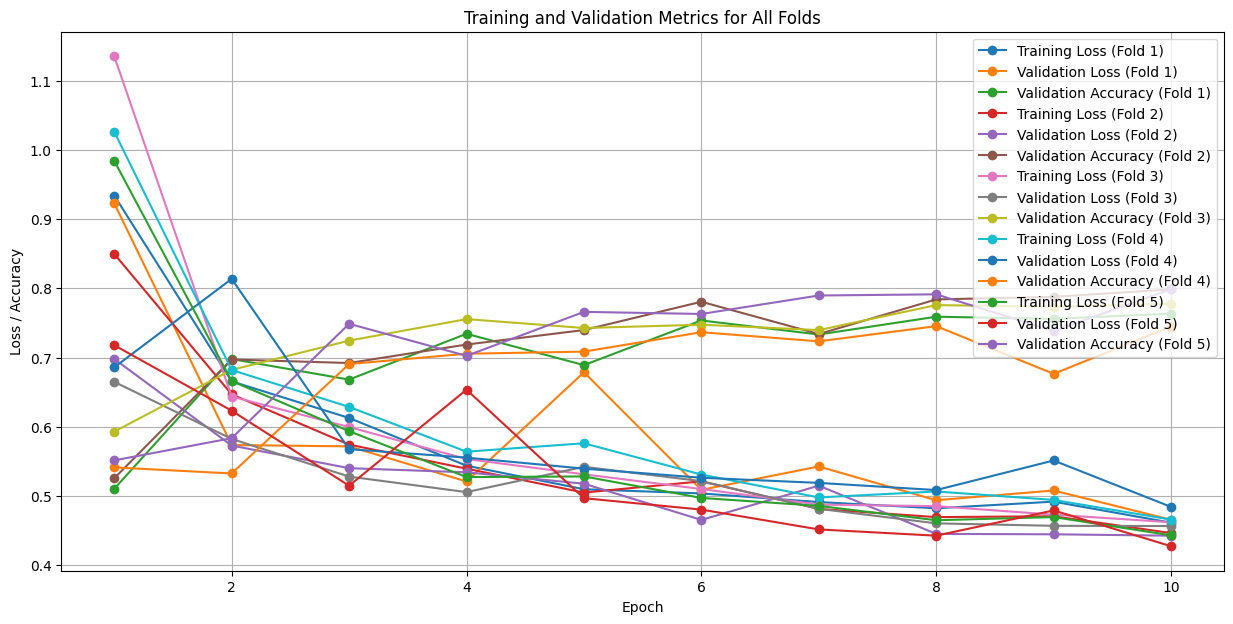

In [ ]:
import matplotlib.pyplot as plt

# Create a single figure for all folds
plt.figure(figsize=(15, 7))

# Plot the training and validation metrics for each fold
for fold in range(5):
    num_epochs_fold = len(train_losses[fold])  # Get the number of epochs for this fold
    plt.plot(range(1, num_epochs_fold + 1), train_losses[fold], label=f'Training Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_losses[fold], label=f'Validation Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_accuracies[fold], label=f'Validation Accuracy (Fold {fold + 1})', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.title('Training and Validation Metrics for All Folds')
plt.grid(True)
plt.show()

In [ ]:
# Create lists to store average values
average_train_losses = []
average_validation_losses = []
average_validation_accuracies = []

for fold in range(5):
    num_epochs_fold = len(train_losses[fold])  # Get the number of epochs for this fold

    # Calculate average values for training losses, validation losses, and validation accuracies
    average_train_loss = sum(train_losses[fold]) / num_epochs_fold
    average_validation_loss = sum(validation_losses[fold]) / num_epochs_fold
    average_validation_accuracy = sum(validation_accuracies[fold]) / num_epochs_fold

    # Append the averages to the respective lists
    average_train_losses.append(average_train_loss)
    average_validation_losses.append(average_validation_loss)
    average_validation_accuracies.append(average_validation_accuracy)

    # Print the averages for each fold
    print(f'Fold {fold + 1} - Average Training Loss: {average_train_loss:.4f} '
          f'Average Validation Loss: {average_validation_loss:.4f} '
          f'Average Validation Accuracy: {average_validation_accuracy:.4f}')

Fold 1 - Average Training Loss: 0.5696 Average Validation Loss: 0.5786 Average Validation Accuracy: 0.7065
Fold 2 - Average Training Loss: 0.5504 Average Validation Loss: 0.5175 Average Validation Accuracy: 0.7259
Fold 3 - Average Training Loss: 0.5881 Average Validation Loss: 0.5199 Average Validation Accuracy: 0.7312
Fold 4 - Average Training Loss: 0.5972 Average Validation Loss: 0.5751 Average Validation Accuracy: 0.6805
Fold 5 - Average Training Loss: 0.5660 Average Validation Loss: 0.5287 Average Validation Accuracy: 0.7234


#Adding more hidden layers

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from torch.utils.tensorboard import SummaryWriter
import random
import numpy as np
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

train_losses = []
validation_losses = []
validation_accuracies = []

# Modify the train_and_validate function to use the BindingPredictionModel
def train_and_validate(train_dataset, validation_dataset, binding_prediction_model, criterion, optimizer, num_epochs, writer, fold):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

    train_losses.append([])
    validation_losses.append([])
    validation_accuracies.append([])

    for epoch in range(num_epochs):
        binding_prediction_model.train()
        running_loss = 0.0

        for batch in train_loader:
            tcr_sequence = batch['TCR_encoded']
            hla_aa_sequence = batch['HLA.aa_encoded']
            antigen_sequence = batch['Antigen_encoded']
            labels = batch['Affinity'].float().unsqueeze(1)

            optimizer.zero_grad()

            # Forward pass
            outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation loop
        binding_prediction_model.eval()
        val_loss = 0.0
        all_labels = []
        all_outputs = []

        with torch.no_grad():
            for batch in validation_loader:
                tcr_sequence = batch['TCR_encoded']
                hla_aa_sequence = batch['HLA.aa_encoded']
                antigen_sequence = batch['Antigen_encoded']
                labels = batch['Affinity'].float().unsqueeze(1)

                # Forward pass
                outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

                # Compute the loss
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.cpu().numpy())

        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        accuracy = accuracy_score(all_labels, (all_outputs > 0.5).astype(int))

        train_losses[fold].append(running_loss / len(train_loader))
        validation_losses[fold].append(val_loss / len(validation_loader))
        validation_accuracies[fold].append(accuracy)

        # Print average training and validation loss and accuracy for the epoch
        print(f'Fold {fold + 1} - Epoch [{epoch + 1}/{num_epochs}] '
              f'Train Loss: {train_losses[fold][-1]} Validation Loss: {validation_losses[fold][-1]} '
              f'Validation Accuracy: {accuracy}')

# Set hyperparameters
embedding_dim = 64
num_amino_acids = len(amino_acids_dict) + 1
input_size = embedding_dim * 3
hidden_size = 264
output_size = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Initialize SummaryWriters for TensorBoard
writers = [SummaryWriter(log_dir=f'logs_fold{fold + 1}') for fold in range(5)]

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, validation_index) in enumerate(kf.split(train_data)):
    print(f'Fold {fold + 1}')

    train_subset = Subset(train_dataset, train_index)
    validation_subset = Subset(train_dataset, validation_index)

    binding_prediction_model = BindingPredictionModel(embedding_dim, num_amino_acids)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(binding_prediction_model.parameters(), lr=learning_rate)

    # Train and validate for this fold
    train_and_validate(train_subset, validation_subset, binding_prediction_model, criterion, optimizer, num_epochs, writers[fold], fold)

for writer in writers:
    writer.close()

In [ ]:
# Create lists to store average values
average_train_losses2 = []
average_validation_losses2 = []
average_validation_accuracies2 = []

for fold in range(5):
    num_epochs_fold = len(train_losses[fold])  # Get the number of epochs for this fold

    # Calculate average values for training losses, validation losses, and validation accuracies
    average_train_loss2 = sum(train_losses[fold]) / num_epochs_fold
    average_validation_loss2 = sum(validation_losses[fold]) / num_epochs_fold
    average_validation_accuracy2 = sum(validation_accuracies[fold]) / num_epochs_fold

    # Append the averages to the respective lists
    average_train_losses2.append(average_train_loss2)
    average_validation_losses2.append(average_validation_loss2)
    average_validation_accuracies2.append(average_validation_accuracy2)

    # Print the averages for each fold
    print(f'Fold {fold + 1} - Average Training Loss: {average_train_loss2:.4f} '
          f'Average Validation Loss: {average_validation_loss2:.4f} '
          f'Average Validation Accuracy: {average_validation_accuracy2:.4f}')

Fold 1 - Average Training Loss: 0.5696 Average Validation Loss: 0.5786 Average Validation Accuracy: 0.7065
Fold 2 - Average Training Loss: 0.5504 Average Validation Loss: 0.5175 Average Validation Accuracy: 0.7259
Fold 3 - Average Training Loss: 0.5881 Average Validation Loss: 0.5199 Average Validation Accuracy: 0.7312
Fold 4 - Average Training Loss: 0.5972 Average Validation Loss: 0.5751 Average Validation Accuracy: 0.6805
Fold 5 - Average Training Loss: 0.5660 Average Validation Loss: 0.5287 Average Validation Accuracy: 0.7234


In [ ]:
#changing the learning rate
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from torch.utils.tensorboard import SummaryWriter
import random
import numpy as np
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

train_losses = []
validation_losses = []
validation_accuracies = []

# Modify the train_and_validate function to use the BindingPredictionModel
def train_and_validate(train_dataset, validation_dataset, binding_prediction_model, criterion, optimizer, num_epochs, writer, fold):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

    train_losses.append([])
    validation_losses.append([])
    validation_accuracies.append([])

    for epoch in range(num_epochs):
        binding_prediction_model.train()
        running_loss = 0.0

        for batch in train_loader:
            tcr_sequence = batch['TCR_encoded']
            hla_aa_sequence = batch['HLA.aa_encoded']
            antigen_sequence = batch['Antigen_encoded']
            labels = batch['Affinity'].float().unsqueeze(1)

            optimizer.zero_grad()

            # Forward pass
            outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation loop
        binding_prediction_model.eval()
        val_loss = 0.0
        all_labels = []
        all_outputs = []

        with torch.no_grad():
            for batch in validation_loader:
                tcr_sequence = batch['TCR_encoded']
                hla_aa_sequence = batch['HLA.aa_encoded']
                antigen_sequence = batch['Antigen_encoded']
                labels = batch['Affinity'].float().unsqueeze(1)

                # Forward pass
                outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

                # Compute the loss
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.cpu().numpy())

        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        accuracy = accuracy_score(all_labels, (all_outputs > 0.5).astype(int))

        train_losses[fold].append(running_loss / len(train_loader))
        validation_losses[fold].append(val_loss / len(validation_loader))
        validation_accuracies[fold].append(accuracy)

        # Print average training and validation loss and accuracy for the epoch
        print(f'Fold {fold + 1} - Epoch [{epoch + 1}/{num_epochs}] '
              f'Train Loss: {train_losses[fold][-1]} Validation Loss: {validation_losses[fold][-1]} '
              f'Validation Accuracy: {accuracy}')

# Set hyperparameters
embedding_dim = 64
num_amino_acids = len(amino_acids_dict) + 1
input_size = embedding_dim * 3
hidden_size = 264
output_size = 1
learning_rate = 0.01
num_epochs = 10
batch_size = 64

# Initialize SummaryWriters for TensorBoard
writers = [SummaryWriter(log_dir=f'logs_fold{fold + 1}') for fold in range(5)]

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, validation_index) in enumerate(kf.split(train_data)):
    print(f'Fold {fold + 1}')

    train_subset = Subset(train_dataset, train_index)
    validation_subset = Subset(train_dataset, validation_index)

    binding_prediction_model = BindingPredictionModel(embedding_dim, num_amino_acids)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(binding_prediction_model.parameters(), lr=learning_rate)

    # Train and validate for this fold
    train_and_validate(train_subset, validation_subset, binding_prediction_model, criterion, optimizer, num_epochs, writers[fold], fold)

for writer in writers:
    writer.close()

Fold 1
Fold 1 - Epoch [1/10] Train Loss: 49.54539208025545 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [2/10] Train Loss: 49.81685632241739 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [3/10] Train Loss: 49.8178935489139 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [4/10] Train Loss: 49.81270743705131 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [5/10] Train Loss: 49.81374466354782 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [6/10] Train Loss: 49.822042434279986 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [7/10] Train Loss: 49.8178935489139 Validation Loss: 51.31205668347947 Validation Accuracy: 0.49273403176748903
Fold 1 - Epoch [8/10] Train Loss: 49.821005207783465 Validation Loss: 51.31205668347947 Validation

In [ ]:

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Set seed for PyTorch
torch.manual_seed(42)

# Define the embedding dimension
embedding_dim = 64

# Define AminoAcidEmbeddingModel and BindingPredictionModel
class AminoAcidEmbeddingModel(nn.Module):
    def __init__(self, embedding_dim, num_amino_acids):
        super(AminoAcidEmbeddingModel, self).__init__()
        self.embedding = nn.Embedding(num_amino_acids, embedding_dim, padding_idx=0)

    def forward(self, x):
        # Create a mask for padding values
        mask = (x != 0).unsqueeze(2).float()

        # x is the input sequence of integer-encoded amino acids
        embedded = self.embedding(x)

        # Apply the mask to zero out padding values
        embedded = embedded * mask

        # Sum along the sequence length to get a fixed-size representation
        embedded = embedded.sum(dim=1)

        return embedded

class BindingPredictionModel(nn.Module):
    def __init__(self, embedding_dim, num_amino_acids):
        super(BindingPredictionModel, self).__init__()

        # Define the amino acid embedding models
        self.tcr_embedding_model = AminoAcidEmbeddingModel(embedding_dim, num_amino_acids)
        self.hla_aa_embedding_model = AminoAcidEmbeddingModel(embedding_dim, num_amino_acids)
        self.antigen_embedding_model = AminoAcidEmbeddingModel(embedding_dim, num_amino_acids)

         # Define the MLP layers
        self.mlp = nn.Sequential(
            nn.Linear(embedding_dim * 3, 256),  # Increased hidden layer size
            nn.ReLU(),
            nn.Linear(256, 128),  # Additional hidden layer
            nn.ReLU(),
            nn.Linear(128, 64),   # Another additional hidden layer
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()  # Assuming binary classification, use Sigmoid activation
        )

    def forward(self, tcr_sequence, hla_aa_sequence, antigen_sequence):
        # Embed sequences using amino acid embedding models
        tcr_embedding = self.tcr_embedding_model(tcr_sequence)
        hla_aa_embedding = self.hla_aa_embedding_model(hla_aa_sequence)
        antigen_embedding = self.antigen_embedding_model(antigen_sequence)

        # Concatenate the embeddings
        combined_embedding = torch.cat([tcr_embedding, hla_aa_embedding, antigen_embedding], dim=1)

        # Pass through MLP
        output = self.mlp(combined_embedding)

        return output

In [ ]:
#changing the number of layers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from torch.utils.tensorboard import SummaryWriter
import random
import numpy as np
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

train_losses = []
validation_losses = []
validation_accuracies = []

# Modify the train_and_validate function to use the BindingPredictionModel
def train_and_validate(train_dataset, validation_dataset, binding_prediction_model, criterion, optimizer, num_epochs, writer, fold):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

    train_losses.append([])
    validation_losses.append([])
    validation_accuracies.append([])

    for epoch in range(num_epochs):
        binding_prediction_model.train()
        running_loss = 0.0

        for batch in train_loader:
            tcr_sequence = batch['TCR_encoded']
            hla_aa_sequence = batch['HLA.aa_encoded']
            antigen_sequence = batch['Antigen_encoded']
            labels = batch['Affinity'].float().unsqueeze(1)

            optimizer.zero_grad()

            # Forward pass
            outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation loop
        binding_prediction_model.eval()
        val_loss = 0.0
        all_labels = []
        all_outputs = []

        with torch.no_grad():
            for batch in validation_loader:
                tcr_sequence = batch['TCR_encoded']
                hla_aa_sequence = batch['HLA.aa_encoded']
                antigen_sequence = batch['Antigen_encoded']
                labels = batch['Affinity'].float().unsqueeze(1)

                # Forward pass
                outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

                # Compute the loss
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.cpu().numpy())

        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        accuracy = accuracy_score(all_labels, (all_outputs > 0.5).astype(int))

        train_losses[fold].append(running_loss / len(train_loader))
        validation_losses[fold].append(val_loss / len(validation_loader))
        validation_accuracies[fold].append(accuracy)

        # Print average training and validation loss and accuracy for the epoch
        print(f'Fold {fold + 1} - Epoch [{epoch + 1}/{num_epochs}] '
              f'Train Loss: {train_losses[fold][-1]} Validation Loss: {validation_losses[fold][-1]} '
              f'Validation Accuracy: {accuracy}')

# Set hyperparameters
embedding_dim = 64
num_amino_acids = len(amino_acids_dict) + 1
input_size = embedding_dim * 3
hidden_size = 264
output_size = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Initialize SummaryWriters for TensorBoard
writers = [SummaryWriter(log_dir=f'logs_fold{fold + 1}') for fold in range(5)]

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, validation_index) in enumerate(kf.split(train_data)):
    print(f'Fold {fold + 1}')

    train_subset = Subset(train_dataset, train_index)
    validation_subset = Subset(train_dataset, validation_index)

    binding_prediction_model = BindingPredictionModel(embedding_dim, num_amino_acids)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(binding_prediction_model.parameters(), lr=learning_rate)

    # Train and validate for this fold
    train_and_validate(train_subset, validation_subset, binding_prediction_model, criterion, optimizer, num_epochs, writers[fold], fold)

for writer in writers:
    writer.close()

Fold 1
Fold 1 - Epoch [1/10] Train Loss: 0.7119078133557294 Validation Loss: 0.6848292261996167 Validation Accuracy: 0.5184183845893883
Fold 1 - Epoch [2/10] Train Loss: 0.6238556749111898 Validation Loss: 0.5995167734775138 Validation Accuracy: 0.6133828996282528
Fold 1 - Epoch [3/10] Train Loss: 0.5773606226250932 Validation Loss: 0.5434768859376299 Validation Accuracy: 0.7012504224400136
Fold 1 - Epoch [4/10] Train Loss: 0.5194800109476656 Validation Loss: 0.5039479916400098 Validation Accuracy: 0.7445082798242649
Fold 1 - Epoch [5/10] Train Loss: 0.49911023764996915 Validation Loss: 0.4882080231575256 Validation Accuracy: 0.7570125042244001
Fold 1 - Epoch [6/10] Train Loss: 0.4835047746026838 Validation Loss: 0.48633158777622465 Validation Accuracy: 0.7573504562352146
Fold 1 - Epoch [7/10] Train Loss: 0.4591135248944566 Validation Loss: 0.4869924352524128 Validation Accuracy: 0.7509293680297398
Fold 1 - Epoch [8/10] Train Loss: 0.44832162760399485 Validation Loss: 0.457808962527741

In [ ]:
#changing the learning rate
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from torch.utils.tensorboard import SummaryWriter
import random
import numpy as np
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

train_losses = []
validation_losses = []
validation_accuracies = []

# Modify the train_and_validate function to use the BindingPredictionModel
def train_and_validate(train_dataset, validation_dataset, binding_prediction_model, criterion, optimizer, num_epochs, writer, fold):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

    train_losses.append([])
    validation_losses.append([])
    validation_accuracies.append([])

    for epoch in range(num_epochs):
        binding_prediction_model.train()
        running_loss = 0.0

        for batch in train_loader:
            tcr_sequence = batch['TCR_encoded']
            hla_aa_sequence = batch['HLA.aa_encoded']
            antigen_sequence = batch['Antigen_encoded']
            labels = batch['Affinity'].float().unsqueeze(1)

            optimizer.zero_grad()

            # Forward pass
            outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation loop
        binding_prediction_model.eval()
        val_loss = 0.0
        all_labels = []
        all_outputs = []

        with torch.no_grad():
            for batch in validation_loader:
                tcr_sequence = batch['TCR_encoded']
                hla_aa_sequence = batch['HLA.aa_encoded']
                antigen_sequence = batch['Antigen_encoded']
                labels = batch['Affinity'].float().unsqueeze(1)

                # Forward pass
                outputs = binding_prediction_model(tcr_sequence, hla_aa_sequence, antigen_sequence)

                # Compute the loss
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.cpu().numpy())

        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        accuracy = accuracy_score(all_labels, (all_outputs > 0.5).astype(int))

        train_losses[fold].append(running_loss / len(train_loader))
        validation_losses[fold].append(val_loss / len(validation_loader))
        validation_accuracies[fold].append(accuracy)

        # Print average training and validation loss and accuracy for the epoch
        print(f'Fold {fold + 1} - Epoch [{epoch + 1}/{num_epochs}] '
              f'Train Loss: {train_losses[fold][-1]} Validation Loss: {validation_losses[fold][-1]} '
              f'Validation Accuracy: {accuracy}')

# Set hyperparameters
embedding_dim = 64
num_amino_acids = len(amino_acids_dict) + 1
input_size = embedding_dim * 3
hidden_size = 264
output_size = 1
learning_rate = 0.0001
num_epochs = 10
batch_size = 64

# Initialize SummaryWriters for TensorBoard
writers = [SummaryWriter(log_dir=f'logs_fold{fold + 1}') for fold in range(5)]

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, validation_index) in enumerate(kf.split(train_data)):
    print(f'Fold {fold + 1}')

    train_subset = Subset(train_dataset, train_index)
    validation_subset = Subset(train_dataset, validation_index)

    binding_prediction_model = BindingPredictionModel(embedding_dim, num_amino_acids)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(binding_prediction_model.parameters(), lr=learning_rate)

    # Train and validate for this fold
    train_and_validate(train_subset, validation_subset, binding_prediction_model, criterion, optimizer, num_epochs, writers[fold], fold)

for writer in writers:
    writer.close()